# Cats vs Dogs 

In this homework, we'll build a model for predicting if we have an image of a dog or a cat. For this, we will use the "Dogs & Cats" dataset that can be downloaded from Kaggle.



### Importing libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img


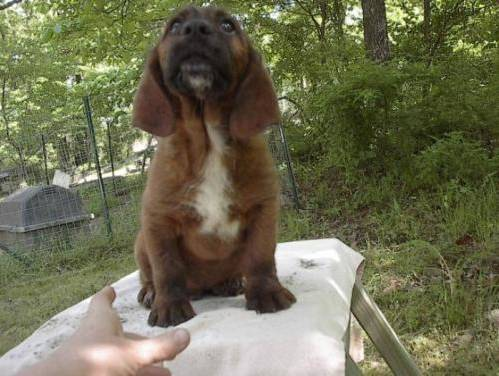

In [2]:
path = 'data/actual/train/dogs'
name = 'dog.5.jpg'
fullname = f'{path}/{name}'
load_img(fullname)


In [3]:
img = load_img(fullname, target_size=(155, 155))


In [4]:
x = np.array(img)
x.shape

(155, 155, 3)

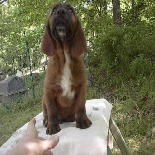

In [5]:
load_img(fullname, target_size=(155, 155))

Dog number 5

In [6]:
def make_model():

    inputs = keras.Input(shape=(150, 150, 3))

    conv = keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150, 150, 3)
    )(inputs)



    pooling = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)

    vectors = keras.layers.Flatten()(pooling) # flatten the pooling 2d output

    inner = keras.layers.Dense(64, activation='relu')(vectors)

    outputs = keras.layers.Dense(1, activation='sigmoid')(inner)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

    loss = keras.losses.BinaryCrossentropy(from_logits=False)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    model.summary()

    return model


In [7]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/actual/train/',
    batch_size=20,
    target_size=(150, 150),
    #binary class mode
    class_mode='binary',
    shuffle=True
)


Found 20000 images belonging to 2 classes.


In [8]:

val_datagen = ImageDataGenerator(rescale=1./255)

val_ds = val_datagen.flow_from_directory(
    './data/actual/validation/',
    batch_size=20,
    target_size=(150, 150),
    # binary class mode
    class_mode='binary',
    shuffle=True
    )


Found 5000 images belonging to 2 classes.


In [9]:
model = make_model()  # refresh model

history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)


2021-11-22 10:23:35.491312: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 10:23:35.519338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 10:23:35.519502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 10:23:35.520354: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

2021-11-22 10:23:36.713989: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2021-11-22 10:23:36.936594: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-22 10:23:36.936979: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-22 10:23:36.937028: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2021-11-22 10:23:36.937391: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-22 10:23:36.937442: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


100/100 [==============================] - 4s 32ms/step - loss: 0.6972 - accuracy: 0.5230 - val_loss: 0.6918 - val_accuracy: 0.5020
Epoch 2/10
100/100 [==============================] - 3s 29ms/step - loss: 0.6894 - accuracy: 0.5330 - val_loss: 0.6864 - val_accuracy: 0.5560
Epoch 3/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6862 - accuracy: 0.5405 - val_loss: 0.6839 - val_accuracy: 0.5440
Epoch 4/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6839 - accuracy: 0.5530 - val_loss: 0.6842 - val_accuracy: 0.5450
Epoch 5/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6795 - accuracy: 0.5675 - val_loss: 0.6924 - val_accuracy: 0.5200
Epoch 6/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6689 - accuracy: 0.5995 - val_loss: 0.6669 - val_accuracy: 0.6010
Epoch 7/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6681 - accuracy: 0.5985 - val_loss: 0.6610 - val_accuracy: 0.5930
Epoch 8/10

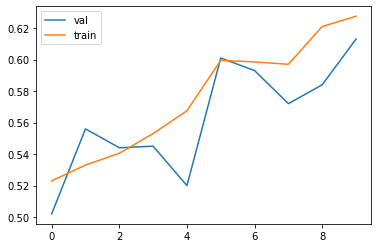

In [10]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()


In [11]:


training_accuracy = np.array(history.history['accuracy'])
val_accuracy = np.array(history.history['val_accuracy'])

print(f'Median of train accuracy: {np.median(training_accuracy)}')
print(f'Median of val accuracy: {np.median(training_accuracy)}')



Median of train accuracy: 0.5822499990463257
Median of val accuracy: 0.5822499990463257


In [12]:
# Q4

training_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

print(f'Standard deviation of training loss: {np.std(training_loss)}')
print(f'Standard deviation of val loss: {np.std(val_loss)}')


Standard deviation of training loss: 0.01676393885123123
Standard deviation of val loss: 0.016371948291987175


In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [14]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)


Epoch 1/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6492 - accuracy: 0.6200 - val_loss: 0.6440 - val_accuracy: 0.6210
Epoch 2/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6394 - accuracy: 0.6265 - val_loss: 0.6345 - val_accuracy: 0.6200
Epoch 3/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6277 - accuracy: 0.6360 - val_loss: 0.6273 - val_accuracy: 0.6300
Epoch 4/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6319 - accuracy: 0.6300 - val_loss: 0.6652 - val_accuracy: 0.5910
Epoch 5/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6338 - accuracy: 0.6235 - val_loss: 0.6281 - val_accuracy: 0.6340
Epoch 6/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6243 - accuracy: 0.6385 - val_loss: 0.6150 - val_accuracy: 0.6530
Epoch 7/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6125 - accuracy: 0.6580 - val_loss: 0.6320 - val_accuracy: 0.6250

<!-- Question 5: Mean for validation loss -->

#### Question 5: Mean for validation loss

In [15]:


val_loss = np.array(history.history['val_loss'])
train_loss = np.array(history.history['loss'])

print(f' Mean for validation  loss: {np.mean(val_loss)}')
print(f' Mean for train  loss: {np.mean(train_loss)}')


 Mean for validation  loss: 0.6297165155410767
 Mean for train  loss: 0.6254766702651977


#### Question 6: Avg validation accuracy for epochs 5-10 


In [16]:
val_last5 = history.history['val_accuracy'][5:10]
val_last5


[0.652999997138977,
 0.625,
 0.6380000114440918,
 0.6200000047683716,
 0.6639999747276306]

In [17]:


print('Avg val accuracy for 5 last epochs: ', np.average(val_last5))


Avg val accuracy for 5 last epochs:  0.6399999976158142


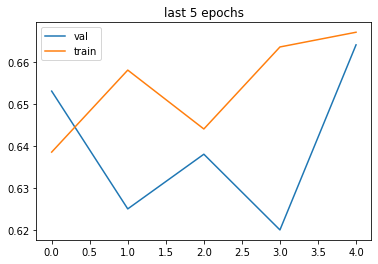

In [20]:
hist = history.history
plt.plot(hist['val_accuracy'][5:10], label='val')
plt.plot(hist['accuracy'][5:10], label='train')
plt.title("last 5 epochs")
plt.legend()
